<a href="https://colab.research.google.com/github/DaveWinc/Wincexercise/blob/main/Final_project_Dave_Koot__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Which non-fossil fuel energy technology will have the best price in the future?**

To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.


https://www.irena.org/Publications/2023/Aug/Renewable-Power-Generation-Costs-in-2022

In [ ]:
#Connecting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Creating usable table

#read csv
df = pd.read_excel('/content/drive/MyDrive/Final Winc project/files for best future price/IRENA_renewable_costs.xlsx', 'Table H.1')

#dropping columns and rows, setting column names and setting index
df.drop([0,1,2,3], axis=0, inplace=True)
df.at[4, 'Unnamed: 0'] = 'Energy source'
df.reset_index(drop=True, inplace=True)
df.columns = df.iloc[0]
df.drop([0], inplace=True)
column_names = ['Energy source', 'A', 'B', 'C', 'D', 'E', 'F', '2010 costs', '2021 costs', 'Percent change']
df.columns = column_names
df.drop(df.columns[1:7], axis=1, inplace=True)
df.drop('Percent change', axis=1, inplace=True)
display(df)




,Energy source,2010 costs,2021 costs
1,Bioenergy,0.082,0.061
2,Geothermal,0.053,0.056
3,Hydropower,0.042,0.061
4,Solar PV,0.445,0.049
5,CSP,0.38,0.118
6,Onshore wind,0.107,0.033
7,Offshore wind,0.197,0.081


In [4]:
#Calculating future prices

#calculating change per year
Yearly_change = (df['2021 costs'] - df['2010 costs']) / 11

#creating column with future price
df['predicted 2030 costs']= df['2021 costs'] + (9*Yearly_change)
df['predicted 2050 costs']= df['2021 costs'] + (29*Yearly_change)

display(df)


,Energy source,2010 costs,2021 costs,predicted 2030 costs,predicted 2050 costs
1,Bioenergy,0.082,0.061,0.043818,0.005636
2,Geothermal,0.053,0.056,0.058455,0.063909
3,Hydropower,0.042,0.061,0.076545,0.111091
4,Solar PV,0.445,0.049,-0.275,-0.995
5,CSP,0.38,0.118,-0.096364,-0.572727
6,Onshore wind,0.107,0.033,-0.027545,-0.162091
7,Offshore wind,0.197,0.081,-0.013909,-0.224818


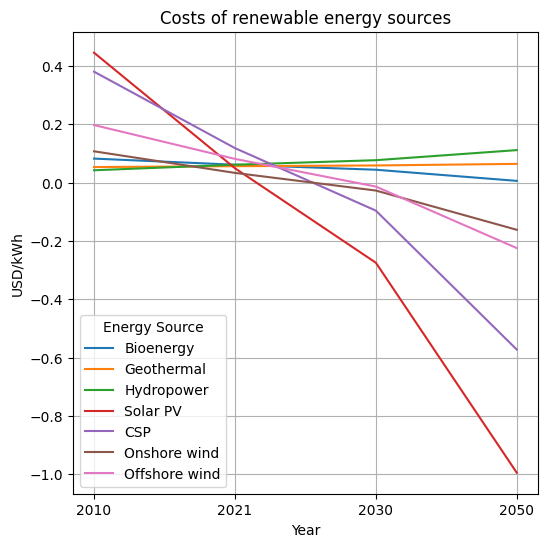

In [5]:
#Creating figure
years = ['2010', '2021', '2030', '2050']
plt.figure(figsize=[6,6])

plt.plot(years, df.iloc[0, 1:], label='Bioenergy')
plt.plot(years, df.iloc[1, 1:], label='Geothermal')
plt.plot(years, df.iloc[2, 1:], label='Hydropower')
plt.plot(years, df.iloc[3, 1:], label='Solar PV')
plt.plot(years, df.iloc[4, 1:], label='CSP')
plt.plot(years, df.iloc[5, 1:], label='Onshore wind')
plt.plot(years, df.iloc[6, 1:], label='Offshore wind')


plt.xlabel('Year')
plt.ylabel('USD/kWh')
plt.legend(title='Energy Source')
plt.title('Costs of renewable energy sources')
plt.grid()

plt.show()